In [433]:
# Import stuff
import pandas as pd 
import math as m
from matplotlib import pyplot as plt

In [335]:
# Read the file
data = pd.read_csv('lab1.csv')

In [502]:
def split_data(data, var, name):
    # Used to split data into multiple dataframes
    df = []
    for v in var:
        df.append(data[data[name] == v])
    return df

def split_averages(data, var, name):
    # Used to find mean values based on selected constant variable
    df = pd.DataFrame()
    for v in var:
        df_new = data[data[name] == v]
        df_ave = df_new.mean()
        df = pd.concat([df, df_ave], axis=1, sort=False)
                
    df = df.transpose()
    return df 

def find_ratio(data):
    # Find pressure and temperature ratios
    p_atm = 1.01325
    p_ratio = []
    t_ratio = []
    for df in data:
        p_ratio.append(list(df['Absolute pressure (bar)']/p_atm))
        t_ratio.append(list(df['T3 (K)']/df['T1 (K)']))
    return p_ratio, t_ratio

def split_n(p_ratio, t_ratio):
    # Find n values in a list
    n_values = []
    for i in range(len(p_ratio)):
        new_list = []
        zipped = zip(p_ratio[i], t_ratio[i])
        for p, t in zipped:
            n = find_n(p, t)
            new_list.append(n)
        n_values.append(new_list)
    return n_values

def find_n(p, T):
    # Find a singular n value
    n = m.log10(p)/(m.log10(1/T) + m.log10(p))
    return n

def merge_lists(ratio):
    # Merge lists to form the x,y values of the graph
    values = []
    for i in range(len(ratio[0])):
        new_list = []
        for j in range(len(ratio)):
            new_list.append(ratio[j][i])
        values.append(new_list)
    return values

In [337]:
# Split dataframes in to each pressure
#p2, p4, p6, p8, p10 = split_data(data, pressure, 'P1 (bar)')
df_pressures = split_data(data, pressure, 'P1 (bar)')

In [360]:
# Average values for each rpm at each pressure
df_rpms_ave = []
for df in df_pressures:
    df_rpms_ave.append(split_averages(df, rpm, 'rpm'))

In [347]:
# Average values for each waterflow at each pressure
df_flowrates_ave = []
for df in df_pressures:
    df_flowrates_ave.append(split_averages(df, flowrate, 'Water Flow Rate (L/min)'))

In [478]:
# Find the pressure and temperature ratios for rpms and flowrates
p_ratio_rpms, t_ratio_rpms = find_ratio(df_rpms_ave)
p_ratio_flowrates, t_ratio_flowrates = find_ratio(df_flowrates_ave)

In [494]:
# Takes in two lists, returns a single list for n ratios then appends that list to another list
n_values_rpms = split_n(p_ratio_rpms, t_ratio_rpms)
n_values_flowrates = split_n(p_ratio_flowrates, t_ratio_flowrates)

In [519]:
# Combine values from each list into respective rpms
x_values_rpm = merge_lists(p_ratio_rpms)
y_values_rpm = merge_lists(n_values_rpms)

In [522]:
# Combine values from each list into respective flowrates
x_values_flowrates = merge_lists(p_ratio_flowrates)
y_values_flowrates = merge_lists(n_values_flowrates)

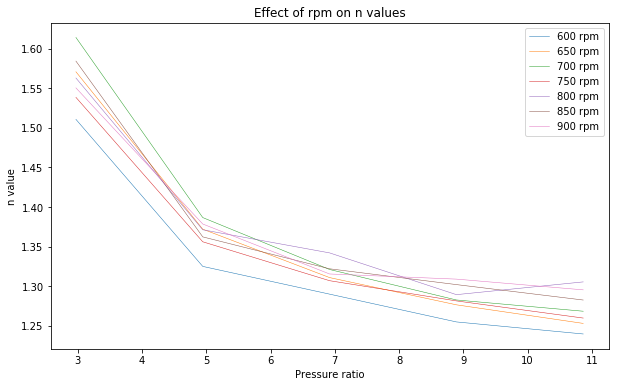

In [523]:
plt.rcParams['figure.figsize'] = [10, 6]
for i in range(len(x_values_rpm)):
    plt.plot(x_values_rpm[i], y_values_rpm[i], linewidth=0.5)
    
plt.xlabel('Pressure ratio')
plt.ylabel('n value')
plt.title('Effect of rpm on n values')
plt.legend([
    '600 rpm',
    '650 rpm',
    '700 rpm',
    '750 rpm',
    '800 rpm',
    '850 rpm',
    '900 rpm',
])

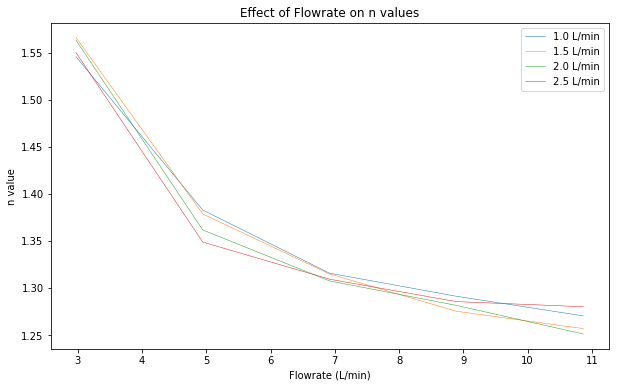

In [524]:
plt.rcParams['figure.figsize'] = [10, 6]
for i in range(len(x_values_flowrates)):
    plt.plot(x_values_flowrates[i], y_values_flowrates[i], linewidth=0.5)
    
plt.xlabel('Flowrate (L/min)')
plt.ylabel('n value')
plt.title('Effect of Flowrate on n values')
plt.legend([
    '1.0 L/min',
    '1.5 L/min',
    '2.0 L/min',
    '2.5 L/min',
])
